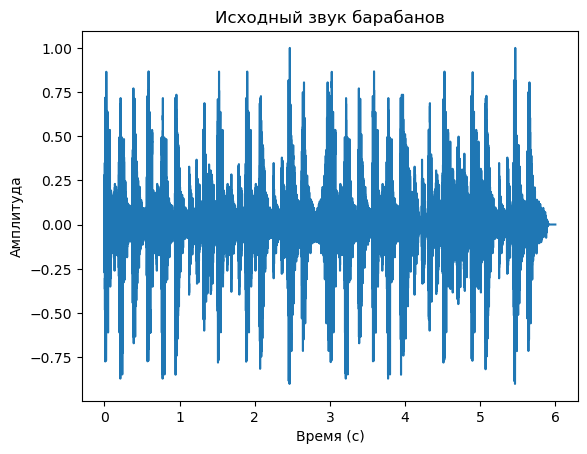

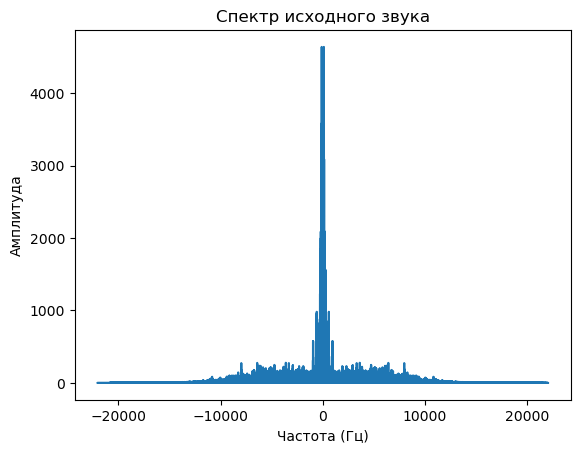

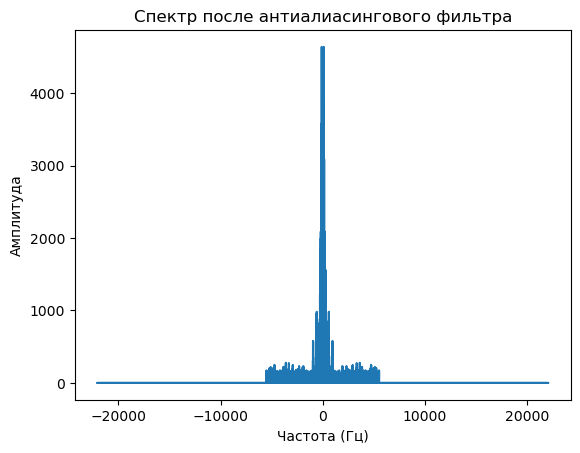

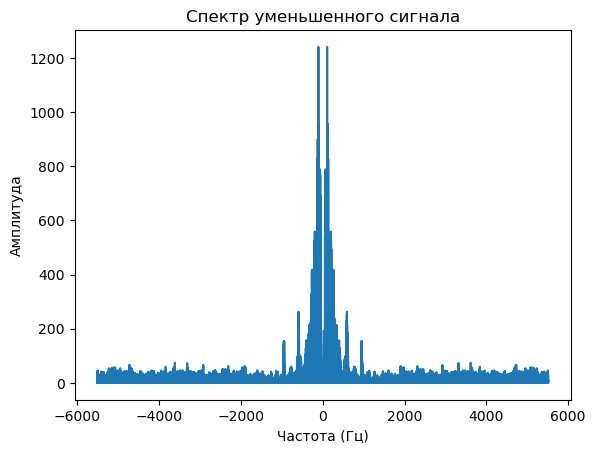

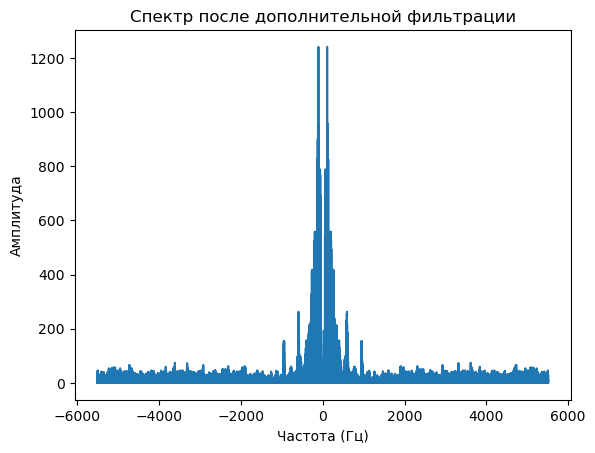

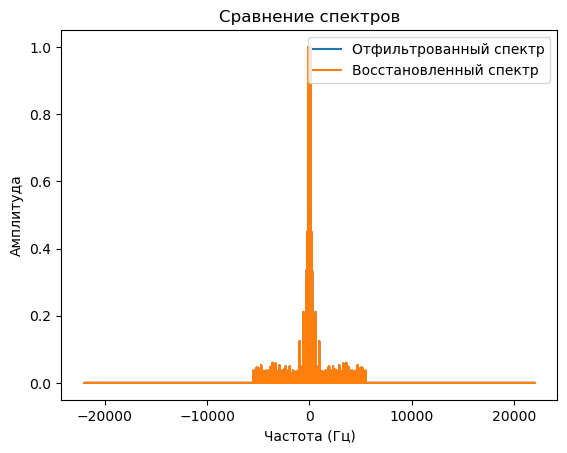

Размер drum_freq: 264600, Размер restored_freq: 264600
Частота дискретизации drum_freq: 44100, restored_freq: 44100
Максимальная разница между спектрами: 3.342213888644167e-16


C:\Users\PC\anaconda3\Lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\PC\anaconda3\Lib\site-packages\matplotlib\cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


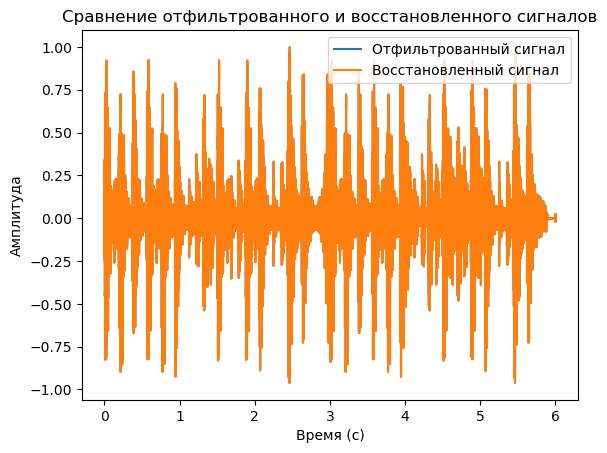

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from thinkdsp import Wave, read_wave
from scipy import signal

def reduce_sampling(waveform, ratio):
    new_size = len(waveform) // ratio
    reduced_data = waveform.ys[::ratio][:new_size]
    new_rate = waveform.framerate // ratio
    return Wave(reduced_data, framerate=new_rate)

def increase_sampling(waveform, target_rate):
    current_rate = waveform.framerate
    sample_count = int(len(waveform.ys) * target_rate / current_rate)
    upsampled_data = signal.resample(waveform.ys, sample_count)
    return Wave(upsampled_data, framerate=target_rate)

drum_audio = read_wave('263868__kevcio__amen-break-a-160-bpm.wav')
drum_audio.normalize()
plt.plot(drum_audio.ts, drum_audio.ys)
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.title('Исходный звук барабанов')
plt.show()

drum_freq = drum_audio.make_spectrum(full=True)
plt.plot(drum_freq.fs, drum_freq.amps)
plt.xlabel('Частота (Гц)')
plt.ylabel('Амплитуда')
plt.title('Спектр исходного звука')
plt.show()

reduction_factor = 4
new_rate_value = drum_audio.framerate // reduction_factor
cutoff_threshold = new_rate_value / 2 - 2
drum_freq.low_pass(cutoff_threshold)
plt.plot(drum_freq.fs, drum_freq.amps)
plt.xlabel('Частота (Гц)')
plt.ylabel('Амплитуда')
plt.title('Спектр после антиалиасингового фильтра')
plt.show()

filtered_audio = drum_freq.make_wave()
filtered_audio.normalize()
reduced_audio = reduce_sampling(filtered_audio, reduction_factor)
reduced_audio.normalize()
reduced_freq = reduced_audio.make_spectrum(full=True)
plt.plot(reduced_freq.fs, reduced_freq.amps)
plt.xlabel('Частота (Гц)')
plt.ylabel('Амплитуда')
plt.title('Спектр уменьшенного сигнала')
plt.show()

reduced_freq.low_pass(cutoff_threshold)
plt.plot(reduced_freq.fs, reduced_freq.amps)
plt.xlabel('Частота (Гц)')
plt.ylabel('Амплитуда')
plt.title('Спектр после дополнительной фильтрации')
plt.show()

restored_audio = increase_sampling(reduced_audio, drum_audio.framerate)
restored_freq = restored_audio.make_spectrum(full=True)
drum_max = np.max(np.abs(drum_freq.hs))
restored_max = np.max(np.abs(restored_freq.hs))
if drum_max != 0 and restored_max != 0:
    drum_freq.hs = drum_freq.hs / drum_max
    restored_freq.hs = restored_freq.hs / restored_max
plt.plot(drum_freq.fs, drum_freq.amps, label='Отфильтрованный спектр')
plt.plot(restored_freq.fs, restored_freq.amps, label='Восстановленный спектр')
plt.xlabel('Частота (Гц)')
plt.ylabel('Амплитуда')
plt.title('Сравнение спектров')
plt.legend()
plt.show()
print(f"Размер drum_freq: {len(drum_freq.hs)}, Размер restored_freq: {len(restored_freq.hs)}")
print(f"Частота дискретизации drum_freq: {drum_freq.framerate}, restored_freq: {restored_freq.framerate}")
max_difference = drum_freq.max_diff(restored_freq)
print(f"Максимальная разница между спектрами: {max_difference}")
restored_audio.normalize()
plt.plot(filtered_audio.ts, filtered_audio.ys, label='Отфильтрованный сигнал')
plt.plot(restored_audio.ts, restored_audio.ys, label='Восстановленный сигнал')
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.title('Сравнение отфильтрованного и восстановленного сигналов')
plt.legend()
plt.show()